# Binary Search Tree

Binary search trees keep their keys in sorted order, so that lookup and other operations can use the principle of binary search: when looking for a key in a tree (or a place to insert a new key), they traverse the tree from root to leaf, making comparisons to keys stored in the nodes of the tree and deciding, on the basis of the comparison, to continue searching in the left or right subtrees. On average, this means that each comparison allows the operations to skip about half of the tree, so that each lookup, insertion or deletion takes time proportional to the logarithm of the number of items stored in the tree. This is much better than the linear time required to find items by key in an (unsorted) array, but slower than the corresponding operations on hash tables.

Reference: https://en.wikipedia.org/wiki/Binary_search_tree


![image](bst_01.png)

#### Define Node class

In [ ]:
# this code makes the tree that we'll traverse

class Node(object):
        
    def __init__(self,value = None):
        self.value = value
        self.left = None
        self.right = None
        
    def set_value(self,value):
        self.value = value
        
    def get_value(self):
        return self.value
        
    def set_left_child(self,left):
        self.left = left
        
    def set_right_child(self, right):
        self.right = right
        
    def get_left_child(self):
        return self.left
    
    def get_right_child(self):
        return self.right

    def has_left_child(self):
        return self.left != None
    
    def has_right_child(self):
        return self.right != None
    
    # define __repr_ to decide what a print statement displays for a Node object
    def __repr__(self):
        return f"Node({self.get_value()})"
    
    def __str__(self):
        return f"Node({self.get_value()})"


In [ ]:
from collections import deque
class Queue():
    def __init__(self):
        self.q = deque()
        
    def enq(self,value):
        self.q.appendleft(value)
        
    def deq(self):
        if len(self.q) > 0:
            return self.q.pop()
        else:
            return None
    
    def __len__(self):
        return len(self.q)
    
    def __repr__(self):
        if len(self.q) > 0:
            s = "<enqueue here>\n_________________\n" 
            s += "\n_________________\n".join([str(item) for item in self.q])
            s += "\n_________________\n<dequeue here>"
            return s
        else:
            return "<queue is empty>"

#### Define insert

Let's assume that duplicates are overriden by the new node that is to be inserted.  Other options are to keep a counter of duplicate nodes, or to keep a list of duplicates nodes with the same value.

In [ ]:
# Solution
class Tree():
    def __init__(self):
        self.root = None
        
    def set_root(self, value):
        self.root = Node(value)
        
    def get_root(self):
        return self.root
    
    def compare(self, node, new_node):
        """
        0 means new_node equals node
        -1 means new node less than existing node
        1 means new node greater than existing node 
        """
        if new_node.get_value() == node.get_value():
            return 0
        elif new_node.get_value() < node.get_value():
            return -1 # traverse left
        else: #new_node > node
            return 1  # traverse right
    
    def insert_with_loop(self, new_value):
        new_node = Node(new_value)
        node = self.get_root()
        if node == None:
            self.root = new_node
            return
        while(True):
            comparison = self.compare(node, new_node)
            if comparison == 0:
                # override with new node's value
                node.set_value(new_node.get_value())
                break # override node, and stop looping
            elif comparison == -1:
                # go left
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    node.set_left_child(new_node)
                    break #inserted node, so stop looping
            else: #comparison == 1
                # go right
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    node.set_right_child(new_node)
                    break # inserted node, so stop looping
         
    def insert_with_recursion(self, value):
        if self.get_root() == None:
            self.set_root(value)
            return
        #otherwise, use recursion to insert the node
        self.insert_recursively(self.get_root(), Node(value))
        
    def insert_recursively(self, node, new_node):
        comparison = self.compare(node, new_node)
        if comparison == 0:
            # equal
            node.set_value(new_node.get_value()) 
        elif comparison == -1:
            # traverse left
            if node.has_left_child():
                self.insert_recursively(node.get_left_child(), new_node)
            else:
                node.set_left_child(new_node)
        else: #comparison == 1
            # traverse right
            if node.has_right_child():
                self.insert_recursively(node.get_right_child(), new_node)
            else:
                node.set_right_child(new_node)
                         
    def __repr__(self):
        level = 0
        q = Queue()
        visit_order = list()
        node = self.get_root()
        q.enq( (node,level) )
        while(len(q) > 0):
            node, level = q.deq()
            if node == None:
                visit_order.append( ("<empty>", level))
                continue
            visit_order.append( (node, level) )
            if node.has_left_child():
                q.enq( (node.get_left_child(), level +1 ))
            else:
                q.enq( (None, level +1) )

            if node.has_right_child():
                q.enq( (node.get_right_child(), level +1 ))
            else:
                q.enq( (None, level +1) )

        s = "Tree\n"
        previous_level = -1
        for i in range(len(visit_order)):
            node, level = visit_order[i]
            if level == previous_level:
                s += " | " + str(node) 
            else:
                s += "\n" + str(node)
                previous_level = level
        return s



In [ ]:
tree = Tree()
tree.insert_with_loop(5)
tree.insert_with_loop(6)
tree.insert_with_loop(4)
tree.insert_with_loop(2)
tree.insert_with_loop(5) # insert duplicate
tree.insert_with_loop(3)
print(tree)

In [ ]:
tree = Tree()
tree.insert_with_recursion(5)
tree.insert_with_recursion(6)
tree.insert_with_recursion(4)
tree.insert_with_recursion(2)
tree.insert_with_recursion(5) # insert duplicate
tree.insert_with_recursion(3)
print(tree)

## Search

Define a search function that takes a value, and returns true if a node containing that value exists in the tree, otherwise false.

Options:
Can return False or None if node doesn't exist, depending on implementation. If found can return True or the node if there is additional info stored.

In [ ]:
# Solution
class Tree():
    def __init__(self):
        self.root = None
        
    def set_root(self,value):
        self.root = Node(value)
        
    def get_root(self):
        return self.root
    
    def compare(self, node, new_node):
        """
        Generalized comparison function
        0 means new_node equals node
        -1 means new node less than existing node
        1 means new node greater than existing node 
        """
        if new_node.get_value() == node.get_value():
            return 0
        elif new_node.get_value() < node.get_value():
            return -1
        else:
            return 1
    
    def insert(self, new_value):
        new_node = Node(new_value)
        node = self.get_root()
        if node == None:
            self.root = new_node
            return
        
        while(True):
            comparison = self.compare(node, new_node)
            if comparison == 0:
                # override with new node
                node = new_node
                break # override node, and stop looping
            elif comparison == -1:
                # go left
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    node.set_left_child(new_node)
                    break #inserted node, so stop looping
            else: #comparison == 1
                # go right
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    node.set_right_child(new_node)
                    break # inserted node, so stop looping
                    
                    
    def search(self, value):
        node = self.get_root()
        s_node = Node(value)
        while(True):
            comparison = self.compare(node, s_node)
            if comparison == 0:
                return True
            elif comparison == -1:
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    return False
            else:
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    return False
                    
    def __repr__(self):
        level = 0
        q = Queue()
        visit_order = list()
        node = self.get_root()
        q.enq( (node,level) )
        while(len(q) > 0):
            node, level = q.deq()
            if node == None:
                visit_order.append( ("<empty>", level))
                continue
            visit_order.append( (node, level) )
            if node.has_left_child():
                q.enq( (node.get_left_child(), level +1 ))
            else:
                q.enq( (None, level +1) )

            if node.has_right_child():
                q.enq( (node.get_right_child(), level +1 ))
            else:
                q.enq( (None, level +1) )

        s = "Tree\n"
        previous_level = -1
        for i in range(len(visit_order)):
            node, level = visit_order[i]
            if level == previous_level:
                s += " | " + str(node) 
            else:
                s += "\n" + str(node)
                previous_level = level
        return s


In [ ]:
tree = Tree()
tree.insert(5)
tree.insert(6)
tree.insert(4)
tree.insert(2)

print(f"""
search for 8: {tree.search(8)}
search for 2: {tree.search(2)}
search for 3: {tree.search(3)}
""")
print(tree)

## Bonus: deletion

Cases:
1. Node to delete is a leaf node
2. Node to delete has one child node
3. Node to delete has two child nodes

Case 1) Set the left or right pointer of parent to `None` to remove node from tree

Case 2) Set the parent's pointer to point to the child's child to go around the deleted node. Set the deleted node to None.

Case 3) Find the next **highest** value by going to the deleted node's **right** and then traversing down the tree to the **left** in order to find the smallest value, which should be a leaf node. Remember everything on the right will be larger than the node to delete. Copy that value and replace the node to be deleted with the copied value. Then have the copied node's parent point to any child that existed on it's right. Set the node that was copied to None.

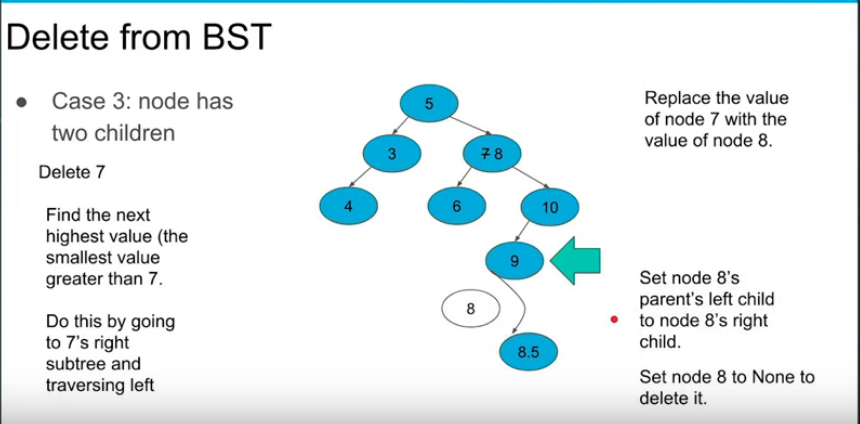

**You can also check out this explanation [Geeks for Geeks](https://www.geeksforgeeks.org/binary-search-tree-set-2-delete/)**

1) Node to be deleted is leaf: Simply remove from the tree.

              50                            50
           /     \         delete(20)      /   \
          30      70       --------->    30     70 
         /  \    /  \                     \    /  \ 
       20   40  60   80                   40  60   80

2) Node to be deleted has only one child: Copy the child to the node and delete the child

              50                            50
           /     \         delete(30)      /   \
          30      70       --------->    40     70 
            \    /  \                          /  \ 
            40  60   80                       60   80

3) Node to be deleted has two children: Find inorder successor of the node. Copy contents of the inorder successor to the node and delete the inorder successor. Note that inorder predecessor can also be used.

              50                            60
           /     \         delete(50)      /   \
          40      70       --------->    40    70 
                 /  \                            \ 
                60   80                           80

The important thing to note is, inorder successor is needed only when right child is not empty. In this particular case, inorder successor can be obtained by finding the minimum value in right child of the node.

In [ ]:
# Python program to demonstrate delete operation 
# in binary search tree 
  
# A Binary Tree Node 
class Node: 
    # Constructor to create a new node 
    def __init__(self, key): 
        self.key = key  
        self.left = None
        self.right = None
  
  
# A utility function to do recursive inorder traversal of BST 
def inorder(root): 
    if root is not None: 
        inorder(root.left) 
        print(root.key, inorder(root.right))
  
  
# A recursive utility function to insert a new node with given key in BST 
def insert(node, key): 
    # If the tree is empty, return a new node 
    if node is None: 
        return Node(key) 
    # Otherwise recur down the tree 
    if key < node.key: 
        node.left = insert(node.left, key) 
    else: 
        node.right = insert(node.right, key) 
    # return the (unchanged) node pointer 
    return node 


# Given a non-empty binary search tree, return the node 
# with minimum key value found in that tree. Note that the 
# entire tree does not need to be searched  
def minValueNode(node): 
    current = node 
    # loop down to find the leftmost leaf 
    while(current.left is not None): 
        current = current.left  
    return current  
  
# Given a binary search tree and a key, this function recursively
# deletes the key and returns the new root 
def deleteNode(root, key): 
    # Base Case 
    if root is None: 
        return root  
  
    # If the key to be deleted is smaller than the root's 
    # key then it lies in  left subtree 
    if key < root.key: 
        root.left = deleteNode(root.left, key) 
  
    # If the key to be deleted is greater than the root's key 
    # then it lies in right subtree 
    elif(key > root.key): 
        root.right = deleteNode(root.right, key) 
  
    # If key is same as root's key, then this is the node to be deleted 
    else: 
        # Node with only one child or no child 
        if root.left is None : 
            temp = root.right  
            root = None 
            return temp  
        elif root.right is None : 
            temp = root.left  
            root = None
            return temp 
  
        # Node with two children: Get the inorder successor 
        # (smallest in the right subtree) 
        temp = minValueNode(root.right) 
  
        # Copy the inorder successor's content to this node 
        root.key = temp.key 
  
        # Delete the inorder successor 
        root.right = deleteNode(root.right, temp.key) 
    return root  

In [ ]:
# Driver program to test above functions 
""" Let us create following BST 
              50 
           /     \ 
          30      70 
         /  \    /  \ 
       20   40  60   80 """
  
root = None
root = insert(root, 50) 
root = insert(root, 30) 
root = insert(root, 20) 
root = insert(root, 40) 
root = insert(root, 70) 
root = insert(root, 60) 
root = insert(root, 80) 
  
print("Inorder traversal of the given tree")
inorder(root) 
  
print("\nDelete 20")
root = deleteNode(root, 20) 
print("Inorder traversal of the modified tree")
inorder(root) 
  
print("\nDelete 30")
root = deleteNode(root, 30) 
print("Inorder traversal of the modified tree")
inorder(root) 
  
print("\nDelete 50")
root = deleteNode(root, 50) 
print("Inorder traversal of the modified tree")
inorder(root) 
  
# This code is contributed by Nikhil Kumar Singh(nickzuck_007) 